In [61]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [62]:
import glob,re

In [63]:
files = glob.glob('%s/out_20171127_*_node_*transformed_MX/cat_opt.json' % path)

In [44]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_13_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_6_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_8_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_11_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_4_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171127_110931_node_3_transformed_MX/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphoton

In [49]:
import json 
import numpy as np

#summary = { x:[] for x in ['node','boundaries','ncat','fom','selections']  }
summary = { x:[] for x in ['node','boundaries','ncat','fom']  }


for fil in files:
    name = fil.split('/')[-2].split('node_')[-1]
    if name == 'SM_transformed_MX': name = '0'
    node = int(name.replace('_transformed_MX',''))
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['boundaries'] = np.array(val['boundaries'])
#        val['selections'] = np.array(val['selections'])
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [50]:
import pandas as pd
df = pd.DataFrame(summary)

In [51]:
df.set_index(['ncat','node'],drop=False,inplace=True)

In [52]:
df.sort_index(inplace=True)
df

boundaries    fom  ncat  node
ncat node                                                       
3    0     [800.0, 535.126, 377.468, 306.923] -4.947     3     0
     2      [800.0, 669.29, 435.869, 250.055] -4.593     3     2
     3      [800.0, 577.42, 456.697, 251.342] -4.840     3     3
     4     [800.0, 536.868, 424.914, 250.001] -4.329     3     4
     5     [800.0, 504.123, 329.611, 258.005] -3.244     3     5
     6     [800.0, 555.623, 436.294, 306.384] -4.868     3     6
     7     [800.0, 537.176, 427.233, 272.837] -4.816     3     7
     8       [800.0, 377.459, 307.518, 250.0] -3.049     3     8
     9     [800.0, 439.348, 342.263, 250.001] -3.571     3     9
     10    [800.0, 438.656, 343.469, 251.071] -4.017     3    10
     11    [800.0, 591.323, 496.473, 254.737] -4.126     3    11
     12    [800.0, 573.257, 439.735, 253.088] -5.324     3    12
     13    [800.0, 572.159, 458.889, 393.776] -5.830     3    13

In [53]:
from sklearn.cluster import KMeans

In [54]:
boundaries = []

for ncats in [3]:
    boundaries.append( np.vstack(df.loc[ncats,'boundaries'].values.tolist()).ravel() )

In [55]:
boundaries = np.hstack(boundaries).ravel()

In [59]:
filtered=boundaries[(boundaries > 260)]
#filtered_2=boundaries[(boundaries > 260) & (boundaries < 800)]
#filtered = boundaries

[ 250.          315.57214286  425.52816667  547.9548      669.29      ]


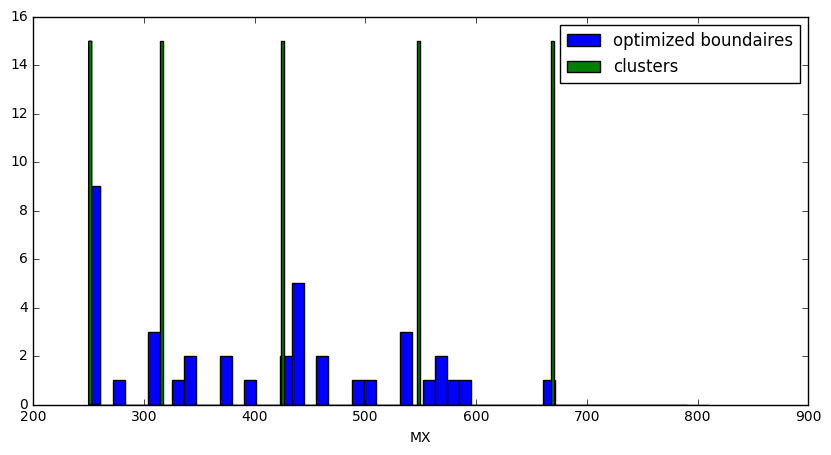

[ 250.          329.32577778  446.00058333  572.02688889]


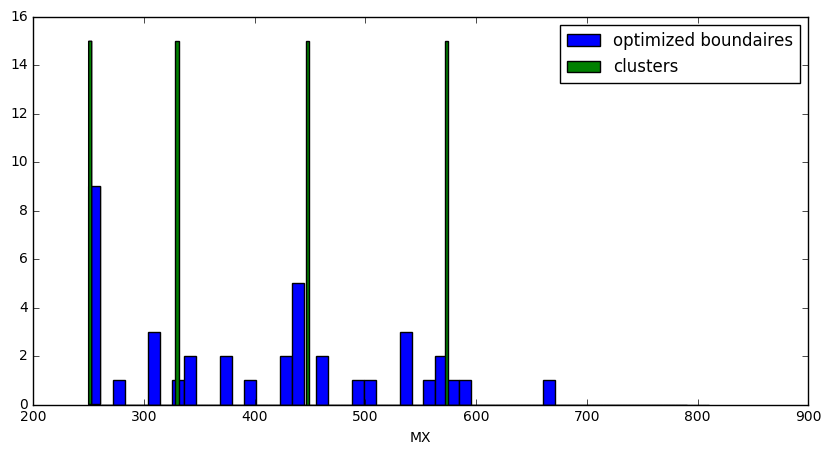

[ 250.          385.01805263  558.98527273]


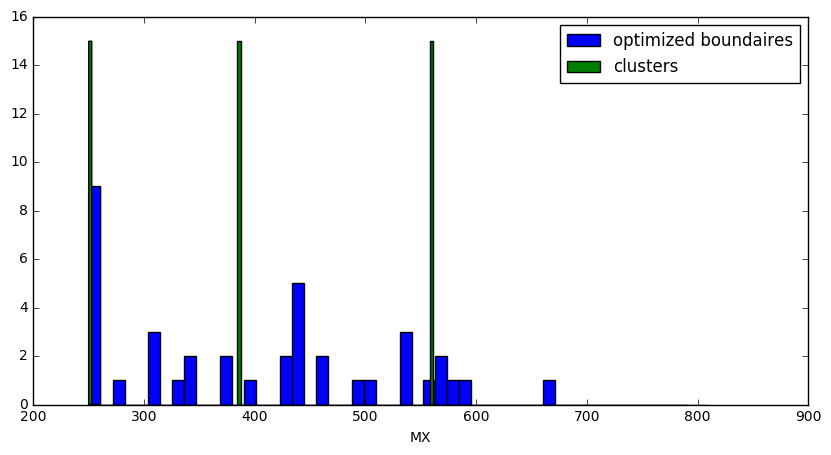

In [60]:
import matplotlib.pyplot as plt
for n_clusters in [4,3,2]:
    plt.figure(figsize=(10,5))
    plt.hist(boundaries,bins=50,range=[250,790],label="optimized boundaires");
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
#     kmeans.fit(filtered_2.reshape(-1,1))
#     centers = np.array(kmeans.cluster_centers_.ravel().tolist()+[250,800]) 
#     plt.hist(centers,bins=200,range=[250,800],weights=40.*np.ones_like(centers));

    kmeans = KMeans(init='k-means++', n_clusters=n_clusters+1, n_init=10)
    kmeans.fit(filtered.reshape(-1,1))
    centers = np.array([250]+kmeans.cluster_centers_.ravel().tolist())
    centers.sort()
    centers=centers[:-1]
    plt.hist(centers,bins=200,range=[250,810],weights=15.*np.ones_like(centers),label="clusters");
    plt.xlabel("MX")
    print(centers)
    
#     kmeans = KMeans(init='k-means++', n_clusters=n_clusters+2, n_init=10)
#     kmeans.fit(boundaries.reshape(-1,1))
#     centers = kmeans.cluster_centers_.ravel() 
#     plt.hist(centers,bins=200,range=[250,800],weights=30.*np.ones_like(centers));
    plt.legend()
    plt.show()